# Projet Machine Learning

Table des matières


## Configuration de l'environnement

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chi2_contingency

# Sklearn preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Models
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

## Parameters

In [3]:
# Set random seed for reproducibility
R_seed = 42
np.random.seed(R_seed)

# Data path
data_path = 'data/Loan_data.csv'
data_description_path = 'data/Dictionnaire_des_données.xlsx'

## 2. Data Exploration

In [4]:
# Load data
df = pd.read_csv(data_path)

df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [5]:
# Basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [6]:
# Descriptive statistics
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [13]:
# Check for missing values
missing_data = df.isnull().sum().mean()
missing_data


np.float64(0.0)

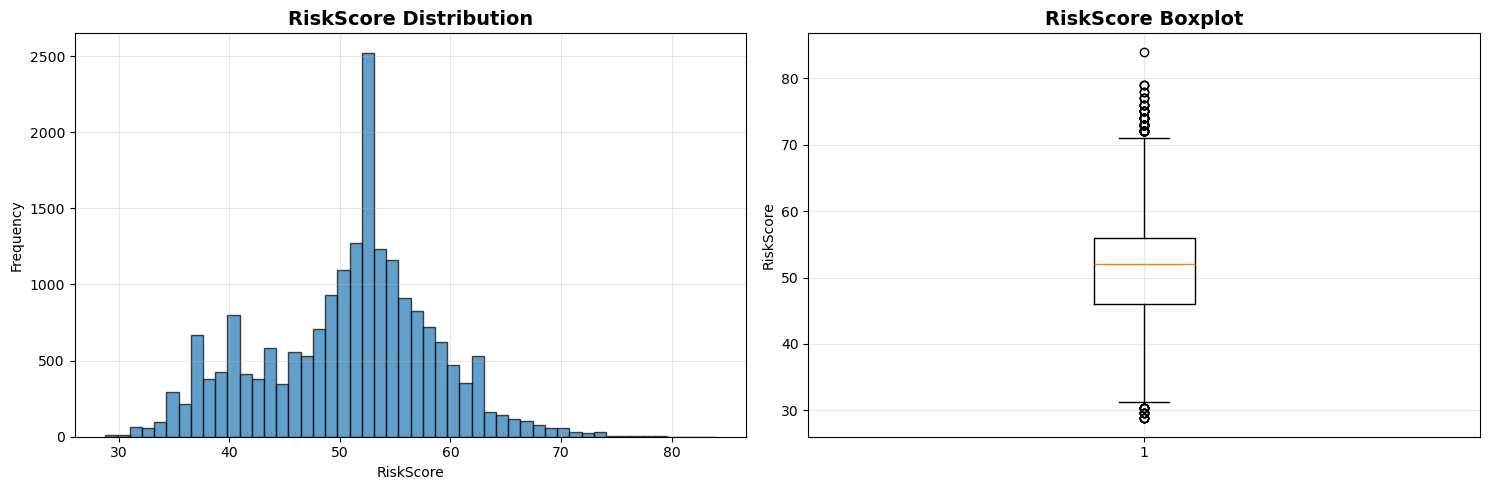

RiskScore Statistics:
  Mean: 50.77
  Median: 52.00
  Std: 7.78
  Min: 28.80
  Max: 84.00


In [14]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['RiskScore'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('RiskScore Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('RiskScore')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['RiskScore'], vert=True)
axes[1].set_title('RiskScore Boxplot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RiskScore')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"RiskScore Statistics:")
print(f"  Mean: {df['RiskScore'].mean():.2f}")
print(f"  Median: {df['RiskScore'].median():.2f}")
print(f"  Std: {df['RiskScore'].std():.2f}")
print(f"  Min: {df['RiskScore'].min():.2f}")
print(f"  Max: {df['RiskScore'].max():.2f}")

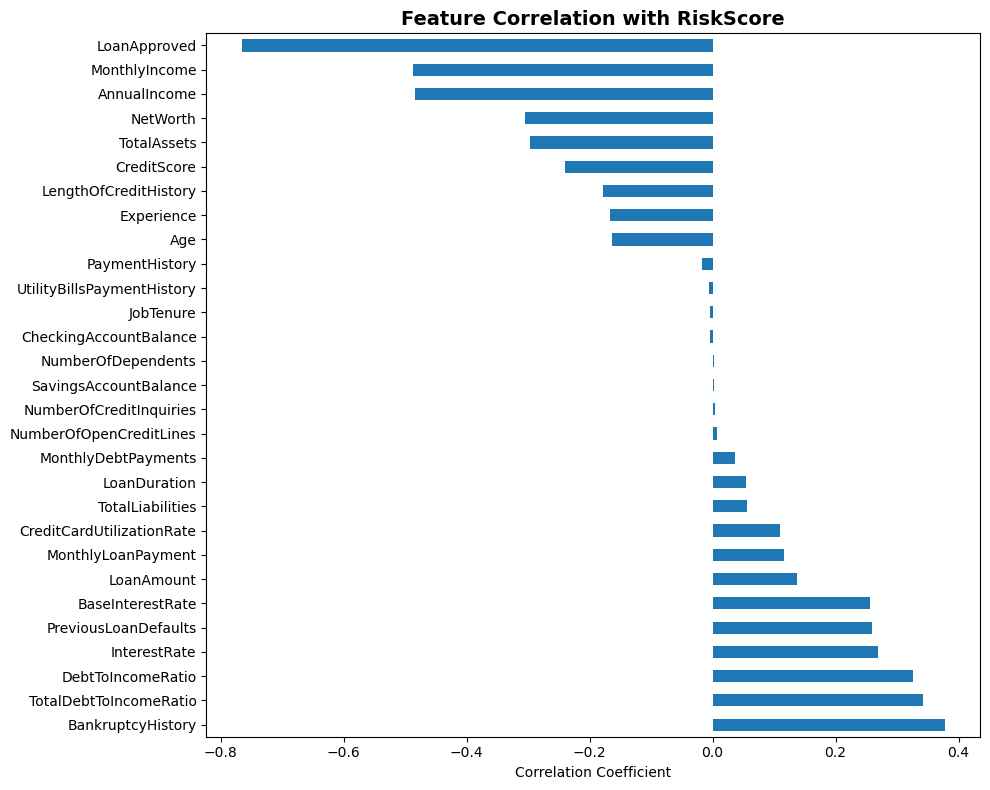


Top 10 correlated features:
RiskScore                    1.000000
BankruptcyHistory            0.377578
TotalDebtToIncomeRatio       0.342643
DebtToIncomeRatio            0.326500
InterestRate                 0.268203
PreviousLoanDefaults         0.258659
BaseInterestRate             0.256233
LoanAmount                   0.137981
MonthlyLoanPayment           0.115501
CreditCardUtilizationRate    0.108758
TotalLiabilities             0.055617
Name: RiskScore, dtype: float64


In [12]:
# Correlation with target variable
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlations = df[numerical_cols].corr()['RiskScore'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
correlations[1:].plot(kind='barh')
plt.title('Feature Correlation with RiskScore', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("\nTop 10 correlated features:")
print(correlations[0:11])

Categorical features: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


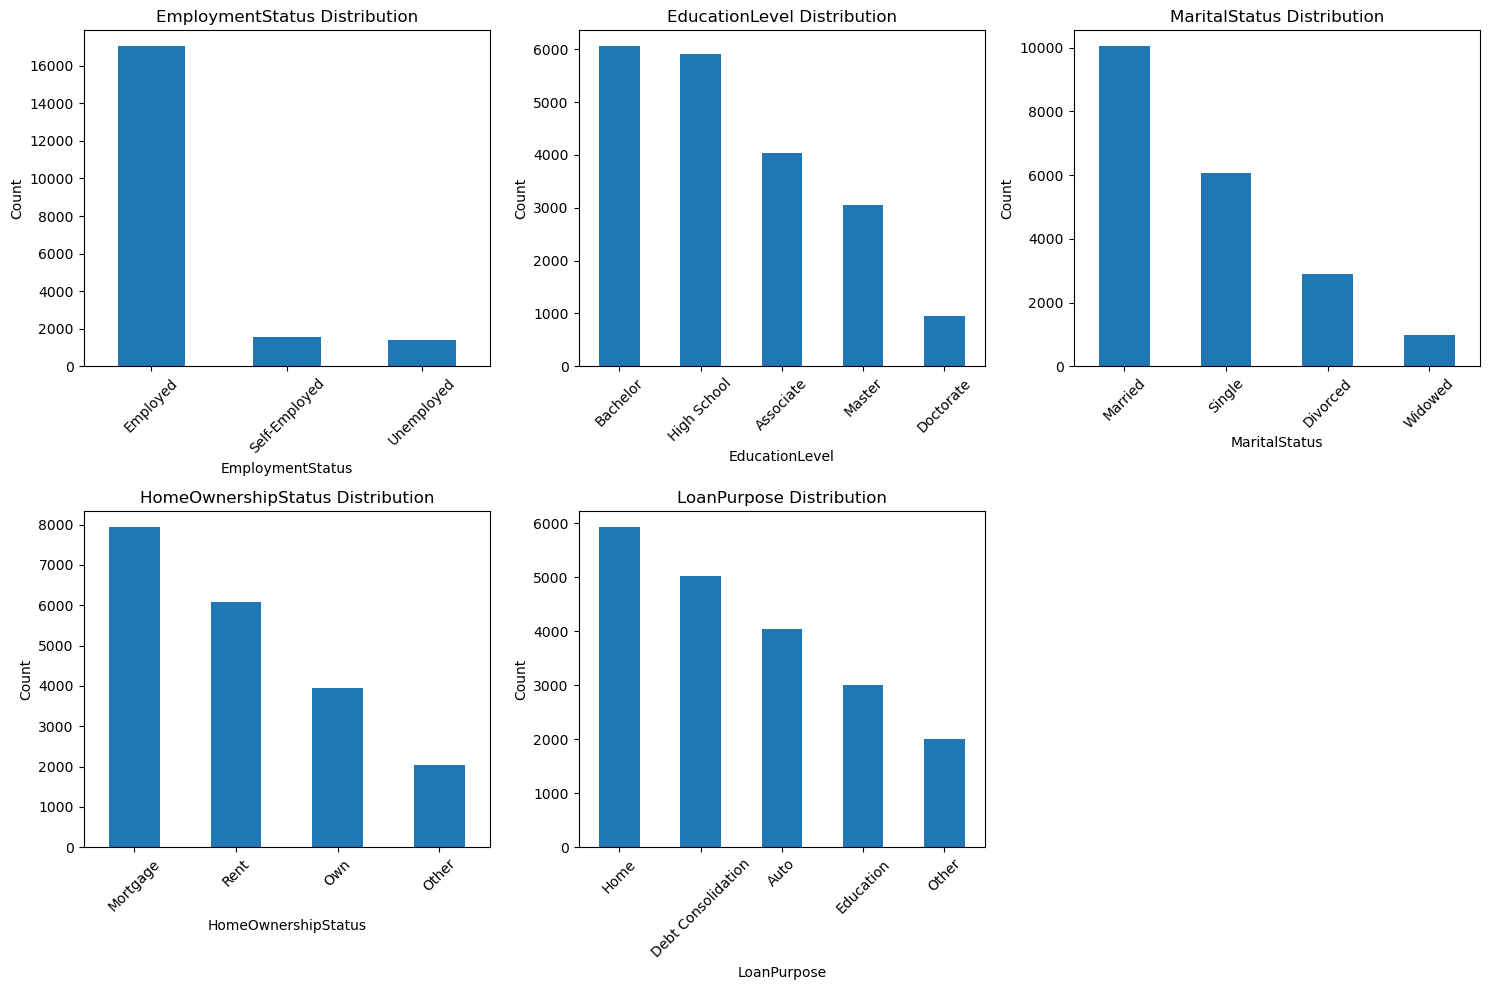

In [9]:
# Visualize categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'ApplicationDate' in categorical_cols:
    categorical_cols.remove('ApplicationDate')

print(f"Categorical features: {categorical_cols}")

if len(categorical_cols) > 0:
    n_cols = 3
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        df[col].value_counts().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Hide unused subplots
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

## 3. Data Preprocessing

In [10]:
# Create a copy for preprocessing
df_processed = df.copy()

# Drop ApplicationDate 
df_processed = df_processed.drop('ApplicationDate', axis=1)

# Encode categorical variables
label_encoders = {}
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_features = [col for col in df_processed.columns if col not in categorical_features]

#On transforme nos listes en dataFrame
vars_categorielles = df_processed[categorical_features]
vars_numeriques = df_processed[numerical_features]

#Création du test du V de Cramer
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

# Test du V de Cramer pour les variables catégorielles
rows= []

for var1 in vars_categorielles:
  col = []
  for var2 in vars_categorielles :
    cramers =cramers_V(vars_categorielles[var1], vars_categorielles[var2]) # V de Cramer
    col.append(round(cramers,2)) # arrondi du résultat   
  rows.append(col)
  
cramers_results = np.array(rows)
v_cramer_resultats = pd.DataFrame(cramers_results, columns = vars_categorielles.columns, 
                                  index =vars_categorielles.columns)

print(v_cramer_resultats)

#Corrélation de Pearson pour les variables numériques
correlations_num = vars_numeriques.corr(method='pearson')
correlations_num 

#On repère les variables trop corrélées
for category in (v_cramer_resultats,correlations_num):
   for i in range(category.shape[0]):
    for j in range(i+1,category.shape[0]) :
      if category.iloc[i,j] > 0.75 :
          print(category.index.to_numpy()[i]+' et '+ category.columns[j] 
                 + ' sont trop dépendantes, V-CRAMER = ' + str(category.iloc[i,j]))



                     EmploymentStatus  EducationLevel  MaritalStatus  \
EmploymentStatus                 1.00            0.01            0.0   
EducationLevel                   0.01            1.00            0.0   
MaritalStatus                    0.00            0.00            1.0   
HomeOwnershipStatus              0.00            0.00            0.0   
LoanPurpose                      0.00            0.00            0.0   

                     HomeOwnershipStatus  LoanPurpose  
EmploymentStatus                     0.0          0.0  
EducationLevel                       0.0          0.0  
MaritalStatus                        0.0          0.0  
HomeOwnershipStatus                  1.0          0.0  
LoanPurpose                          0.0          1.0  
Age et Experience sont trop dépendantes, V-CRAMER = 0.9829802792421133
AnnualIncome et MonthlyIncome sont trop dépendantes, V-CRAMER = 0.9899107753669871
LoanAmount et MonthlyLoanPayment sont trop dépendantes, V-CRAMER = 0.78082782

In [ ]:
#Gestion des données

print((df['Age'] - df['Experience']).mean())
print((df['AnnualIncome'] / df['MonthlyIncome']).median())
print(((df['TotalAssets'] - df['TotalLiabilities'])-df['NetWorth']).median())


22.22985
12.0
0.0


In [ ]:
var_drop = ['Age','AnnualIncome', 'NetWorth', 'InterestRate','LoanApproved']
data = df_processed.drop(columns=var_drop)
data['LoanToIncome'] = data['MonthlyLoanPayment'] / (data['MonthlyIncome'] + 1) #pour ne pas diviser par 0
data['LiabilitiesToAssets'] = data['TotalLiabilities'] / (data['TotalAssets'] + 1)

# Estimation du revenu disponible mensuel
data['DisposableIncome'] = (data['MonthlyIncome']) - data['MonthlyDebtPayments'] - data['MonthlyLoanPayment']

In [ ]:
ordinal_cols = ['EducationLevel'] 
# Ordre précis pour l'Education
edu_order = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

ord_encoder = OrdinalEncoder(categories=[edu_order], unknown_value=-1)

# Pas d'ordre -> OneHot
categorical_cols = ['EmploymentStatus', 'MaritalStatus', 'LoanPurpose', 'HomeOwnershipStatus'] 

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

## 4. Train/Validation/Test Split

In [ ]:
# Separate features and target before removal
X = df_processed.drop('RiskScore', axis=1)
y = df_processed['RiskScore']

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=R_seed
)

# Second split: divide temp into train (64%) and validation (16%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=R_seed
)

## 5. Feature Scaling

In [ ]:
# Standardisation des données
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Encodage des variables catégorielles

X_train_ord = ord_encoder.fit_transform(X_train[ordinal_cols])
X_test_ord = ord_encoder.transform(X_test[ordinal_cols])


✅ Feature scaling complete

Scaled feature statistics (training set):
      Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
mean -0.0           0.0          0.0              -0.0             0.0   
std   1.0           1.0          1.0               1.0             1.0   

      Experience  LoanAmount  LoanDuration  MaritalStatus  NumberOfDependents  \
mean        -0.0        -0.0          -0.0           -0.0                 0.0   
std          1.0         1.0           1.0            1.0                 1.0   

      HomeOwnershipStatus  MonthlyDebtPayments  CreditCardUtilizationRate  \
mean                  0.0                 -0.0                       -0.0   
std                   1.0                  1.0                        1.0   

      NumberOfOpenCreditLines  NumberOfCreditInquiries  DebtToIncomeRatio  \
mean                     -0.0                      0.0                0.0   
std                       1.0                      1.0                1.0   


## 6. Cross-Validation Setup

In [ ]:
# Define K-Fold cross-validation
N_FOLDS = 5
kfold = KFold(n_splits=N_FOLDS, shuffle=True, random_state=R_seed)

print(f"Cross-validation setup: {N_FOLDS}-fold")
print(f"Random seed: {R_seed}")

Cross-validation setup: 5-fold
Random seed: 42


## 7. Evaluation Metrics Function

In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    """
    Evaluate a trained model on train, validation, and test sets.
    
    Parameters:
    -----------
    model : trained model
    X_train, y_train : training data
    X_val, y_val : validation data
    X_test, y_test : test data
    model_name : str, name of the model
    
    Returns:
    --------
    dict : metrics for each dataset
    """
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train_MAE': mean_absolute_error(y_train, y_train_pred),
        'Train_R2': r2_score(y_train, y_train_pred),
        'Val_RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'Val_MAE': mean_absolute_error(y_val, y_val_pred),
        'Val_R2': r2_score(y_val, y_val_pred),
        'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test_MAE': mean_absolute_error(y_test, y_test_pred),
        'Test_R2': r2_score(y_test, y_test_pred)
    }
    
    # Print results
    print(f"\n{'='*80}")
    print(f"{model_name} - Performance Metrics")
    print(f"{'='*80}")
    print(f"\nTraining Set:")
    print(f"  RMSE: {metrics['Train_RMSE']:.4f}")
    print(f"  MAE:  {metrics['Train_MAE']:.4f}")
    print(f"  R²:   {metrics['Train_R2']:.4f}")
    print(f"\nValidation Set:")
    print(f"  RMSE: {metrics['Val_RMSE']:.4f}")
    print(f"  MAE:  {metrics['Val_MAE']:.4f}")
    print(f"  R²:   {metrics['Val_R2']:.4f}")
    print(f"\nTest Set:")
    print(f"  RMSE: {metrics['Test_RMSE']:.4f}")
    print(f"  MAE:  {metrics['Test_MAE']:.4f}")
    print(f"  R²:   {metrics['Test_R2']:.4f}")
    
    return metrics

# Initialize results storage
all_results = []

print("Evaluation function defined")

✅ Evaluation function defined


---
# Model 1: Ridge Regression (L2)

In [ ]:
print("Training Ridge Regression...")

# Hyperparameter tuning
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

ridge = Ridge(random_state=R_seed)
ridge_grid = GridSearchCV(
    ridge, 
    ridge_params, 
    cv=kfold, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

ridge_grid.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {ridge_grid.best_params_}")
print(f"Best CV RMSE: {-ridge_grid.best_score_:.4f}")

# Evaluate on all sets
ridge_best = ridge_grid.best_estimator_
ridge_metrics = evaluate_model(
    ridge_best, 
    X_train_scaled, y_train, 
    X_val_scaled, y_val, 
    X_test_scaled, y_test,
    'Ridge Regression'
)
all_results.append(ridge_metrics)

Training Ridge Regression...
Fitting 5 folds for each of 7 candidates, totalling 35 fits

✅ Best parameters: {'alpha': 10}
✅ Best CV RMSE: 1.9569

Ridge Regression - Performance Metrics

Training Set:
  RMSE: 1.9469
  MAE:  1.5107
  R²:   0.9368

Validation Set:
  RMSE: 1.8817
  MAE:  1.4907
  R²:   0.9413

Test Set:
  RMSE: 2.0101
  MAE:  1.5326
  R²:   0.9349

✅ Best parameters: {'alpha': 10}
✅ Best CV RMSE: 1.9569

Ridge Regression - Performance Metrics

Training Set:
  RMSE: 1.9469
  MAE:  1.5107
  R²:   0.9368

Validation Set:
  RMSE: 1.8817
  MAE:  1.4907
  R²:   0.9413

Test Set:
  RMSE: 2.0101
  MAE:  1.5326
  R²:   0.9349


In [1]:
# Distribution du RiskScore selon LoanApproved
df.groupby('LoanApproved')['RiskScore'].describe()

# Résultat attendu :
# LoanApproved = No  → RiskScore moyen élevé (ex: 65-75)
# LoanApproved = Yes → RiskScore moyen faible (ex: 35-45)

NameError: name 'df' is not defined

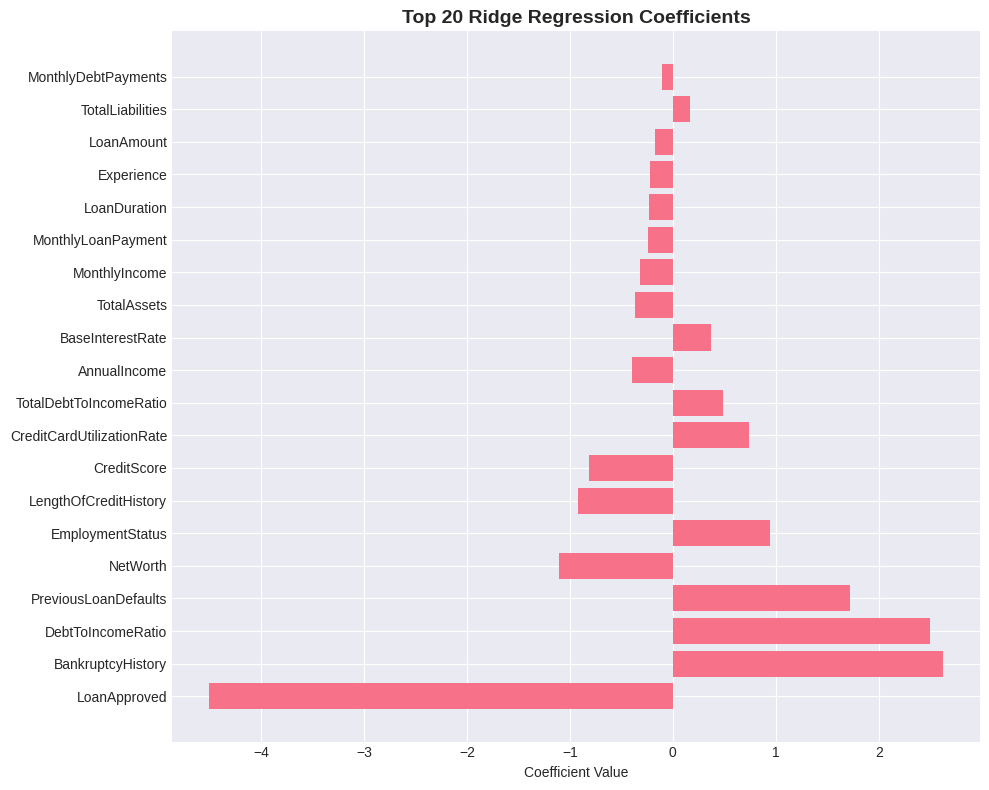

In [16]:
# Visualize Ridge coefficients
ridge_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_best.coef_
}).sort_values('Coefficient', key=abs, ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(ridge_coef['Feature'], ridge_coef['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Ridge Regression Coefficients', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
# Model 2: Random Forest Regressor

In [ ]:
print("Training Random Forest Regressor...")

# Hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=R_seed, n_jobs=-1)
rf_random = RandomizedSearchCV(
    rf, 
    rf_params, 
    n_iter=30,
    cv=kfold, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=R_seed,
    verbose=1
)

rf_random.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {rf_random.best_params_}")
print(f"Best CV RMSE: {-rf_random.best_score_:.4f}")

# Evaluate on all sets
rf_best = rf_random.best_estimator_
rf_metrics = evaluate_model(
    rf_best, 
    X_train_scaled, y_train, 
    X_val_scaled, y_val, 
    X_test_scaled, y_test,
    'Random Forest'
)
all_results.append(rf_metrics)

Training Random Forest Regressor...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
✅ Best CV RMSE: 1.7724

✅ Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
✅ Best CV RMSE: 1.7724

Random Forest - Performance Metrics

Training Set:
  RMSE: 0.6393
  MAE:  0.4745
  R²:   0.9932

Validation Set:
  RMSE: 1.6867
  MAE:  1.2629
  R²:   0.9528

Test Set:
  RMSE: 1.7000
  MAE:  1.2669
  R²:   0.9535

Random Forest - Performance Metrics

Training Set:
  RMSE: 0.6393
  MAE:  0.4745
  R²:   0.9932

Validation Set:
  RMSE: 1.6867
  MAE:  1.2629
  R²:   0.9528

Test Set:
  RMSE: 1.7000
  MAE:  1.2669
  R²:   0.9535


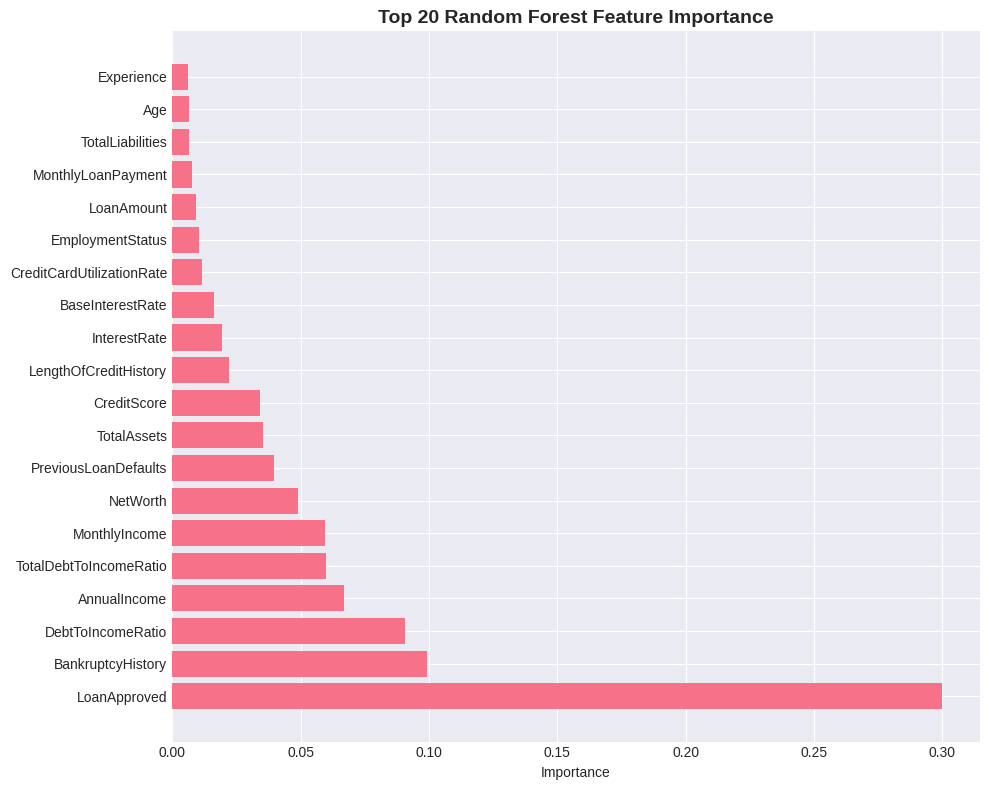

In [22]:
# Feature importance
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(rf_importance['Feature'], rf_importance['Importance'])
plt.xlabel('Importance')
plt.title('Top 20 Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
# Model 3: XGBoost Regressor

In [ ]:
print("Training XGBoost Regressor...")

# Hyperparameter tuning
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBRegressor(
    random_state=R_seed,
    n_jobs=-1,
    tree_method='hist'
)

xgb_random = RandomizedSearchCV(
    xgb_model, 
    xgb_params, 
    n_iter=30,
    cv=kfold, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=R_seed,
    verbose=1
)

xgb_random.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {xgb_random.best_params_}")
print(f"Best CV RMSE: {-xgb_random.best_score_:.4f}")

# Evaluate on all sets
xgb_best = xgb_random.best_estimator_
xgb_metrics = evaluate_model(
    xgb_best, 
    X_train_scaled, y_train, 
    X_val_scaled, y_val, 
    X_test_scaled, y_test,
    'XGBoost'
)
all_results.append(xgb_metrics)

Training XGBoost Regressor...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
✅ Best CV RMSE: 0.3933

XGBoost - Performance Metrics

Training Set:
  RMSE: 0.2133
  MAE:  0.1431
  R²:   0.9992

Validation Set:
  RMSE: 0.3680
  MAE:  0.2187
  R²:   0.9978

Test Set:
  RMSE: 0.3548
  MAE:  0.2122
  R²:   0.9980

✅ Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
✅ Best CV RMSE: 0.3933

XGBoost - Performance Metrics

Training Set:
  RMSE: 0.2133
  MAE:  0.1431
  R²:   0.9992

Validation Set:
  RMSE: 0.3680
  MAE:  0.2187
  R²:   0.9978

Test Set:
  RMSE: 0.3548
  MAE:  0.2122
  R²:   0.9980


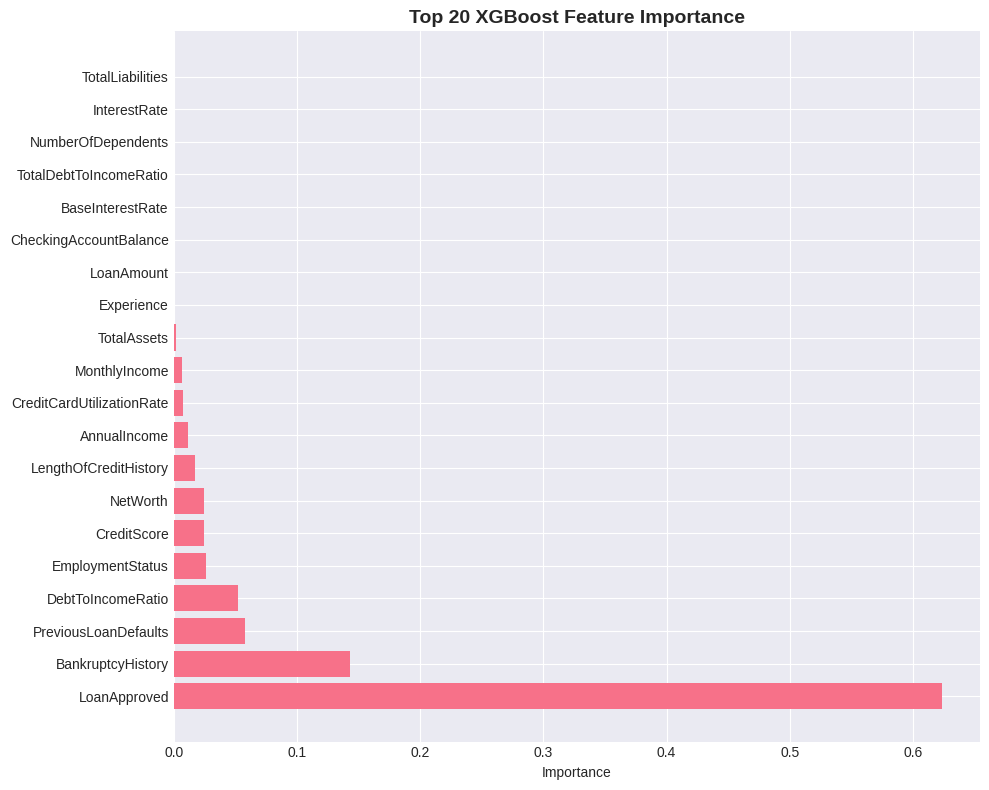

In [24]:
# Feature importance
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_best.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(xgb_importance['Feature'], xgb_importance['Importance'])
plt.xlabel('Importance')
plt.title('Top 20 XGBoost Feature Importance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
# Model 4: CatBoost Regressor

In [ ]:
print("Training CatBoost Regressor...")

# Hyperparameter tuning
catboost_params = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7]
}

catboost_model = CatBoostRegressor(
    random_state=R_seed,
    verbose=0,
    thread_count=-1
)

catboost_random = RandomizedSearchCV(
    catboost_model, 
    catboost_params, 
    n_iter=20,
    cv=kfold, 
    scoring='neg_root_mean_squared_error',
    n_jobs=1,  # CatBoost handles parallelization internally
    random_state=R_seed,
    verbose=1
)

catboost_random.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {catboost_random.best_params_}")
print(f"Best CV RMSE: {-catboost_random.best_score_:.4f}")

# Evaluate on all sets
catboost_best = catboost_random.best_estimator_
catboost_metrics = evaluate_model(
    catboost_best, 
    X_train_scaled, y_train, 
    X_val_scaled, y_val, 
    X_test_scaled, y_test,
    'CatBoost'
)
all_results.append(catboost_metrics)

Training CatBoost Regressor...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Best parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 6}
✅ Best CV RMSE: 0.2909

CatBoost - Performance Metrics

Training Set:
  RMSE: 0.1940
  MAE:  0.1190
  R²:   0.9994

Validation Set:
  RMSE: 0.2497
  MAE:  0.1412
  R²:   0.9990

Test Set:
  RMSE: 0.2363
  MAE:  0.1336
  R²:   0.9991

✅ Best parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 6}
✅ Best CV RMSE: 0.2909

CatBoost - Performance Metrics

Training Set:
  RMSE: 0.1940
  MAE:  0.1190
  R²:   0.9994

Validation Set:
  RMSE: 0.2497
  MAE:  0.1412
  R²:   0.9990

Test Set:
  RMSE: 0.2363
  MAE:  0.1336
  R²:   0.9991


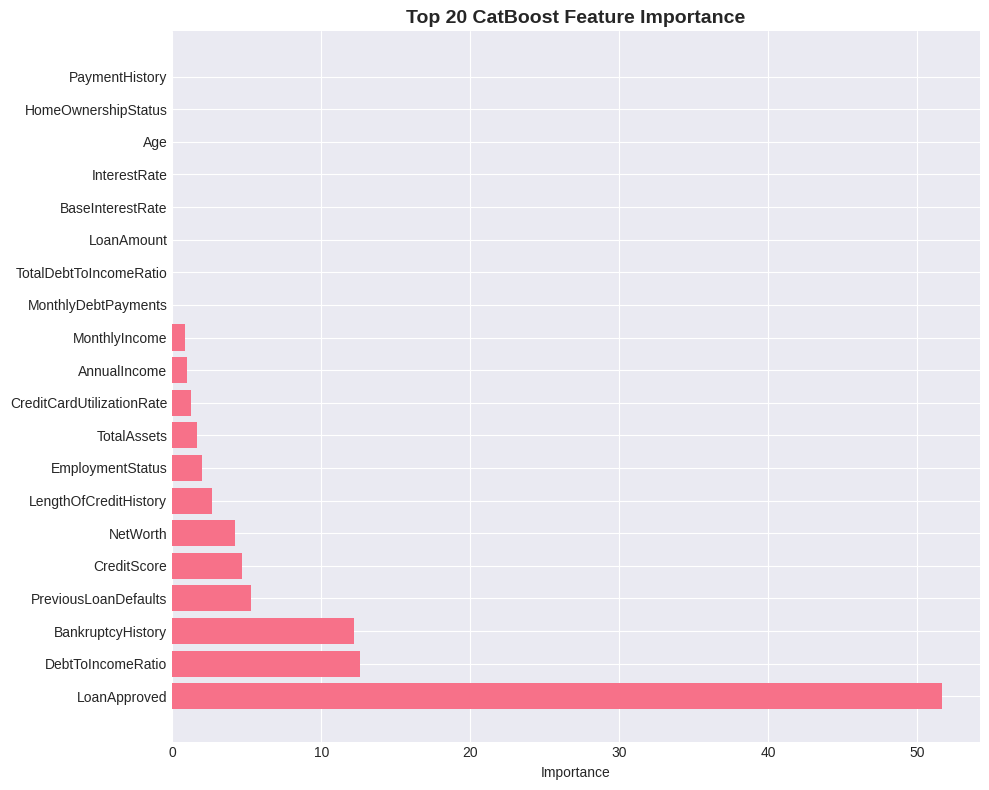

In [26]:
# Feature importance
catboost_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': catboost_best.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(catboost_importance['Feature'], catboost_importance['Importance'])
plt.xlabel('Importance')
plt.title('Top 20 CatBoost Feature Importance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
# Results Comparison and Analysis

In [ ]:
# Create comprehensive results DataFrame
results_df = pd.DataFrame(all_results)

print("\n" + "="*120)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*120)
print(results_df.to_string(index=False))
print("="*120)


COMPREHENSIVE MODEL COMPARISON
           Model  Train_RMSE  Train_MAE  Train_R2  Val_RMSE  Val_MAE   Val_R2  Test_RMSE  Test_MAE  Test_R2
Ridge Regression    1.946907   1.510742  0.936848  1.881690 1.490657 0.941250   2.010076  1.532577 0.934924
Lasso Regression    1.947706   1.511735  0.936796  1.883052 1.492807 0.941165   2.009891  1.532591 0.934936
   Decision Tree    0.829514   0.510916  0.988536  1.387629 0.866159 0.968051   1.370448  0.851510 0.969750
   Random Forest    0.639258   0.474533  0.993192  1.686731 1.262852 0.952794   1.700008  1.266856 0.953452
         XGBoost    0.213251   0.143076  0.999242  0.367961 0.218685 0.997753   0.354825  0.212216 0.997972
        CatBoost    0.193969   0.118990  0.999373  0.249735 0.141168 0.998965   0.236315  0.133554 0.999101
          1D CNN    5.500662   4.363660  0.495887  5.626266 4.436187 0.474770   5.601540  4.402910 0.494628


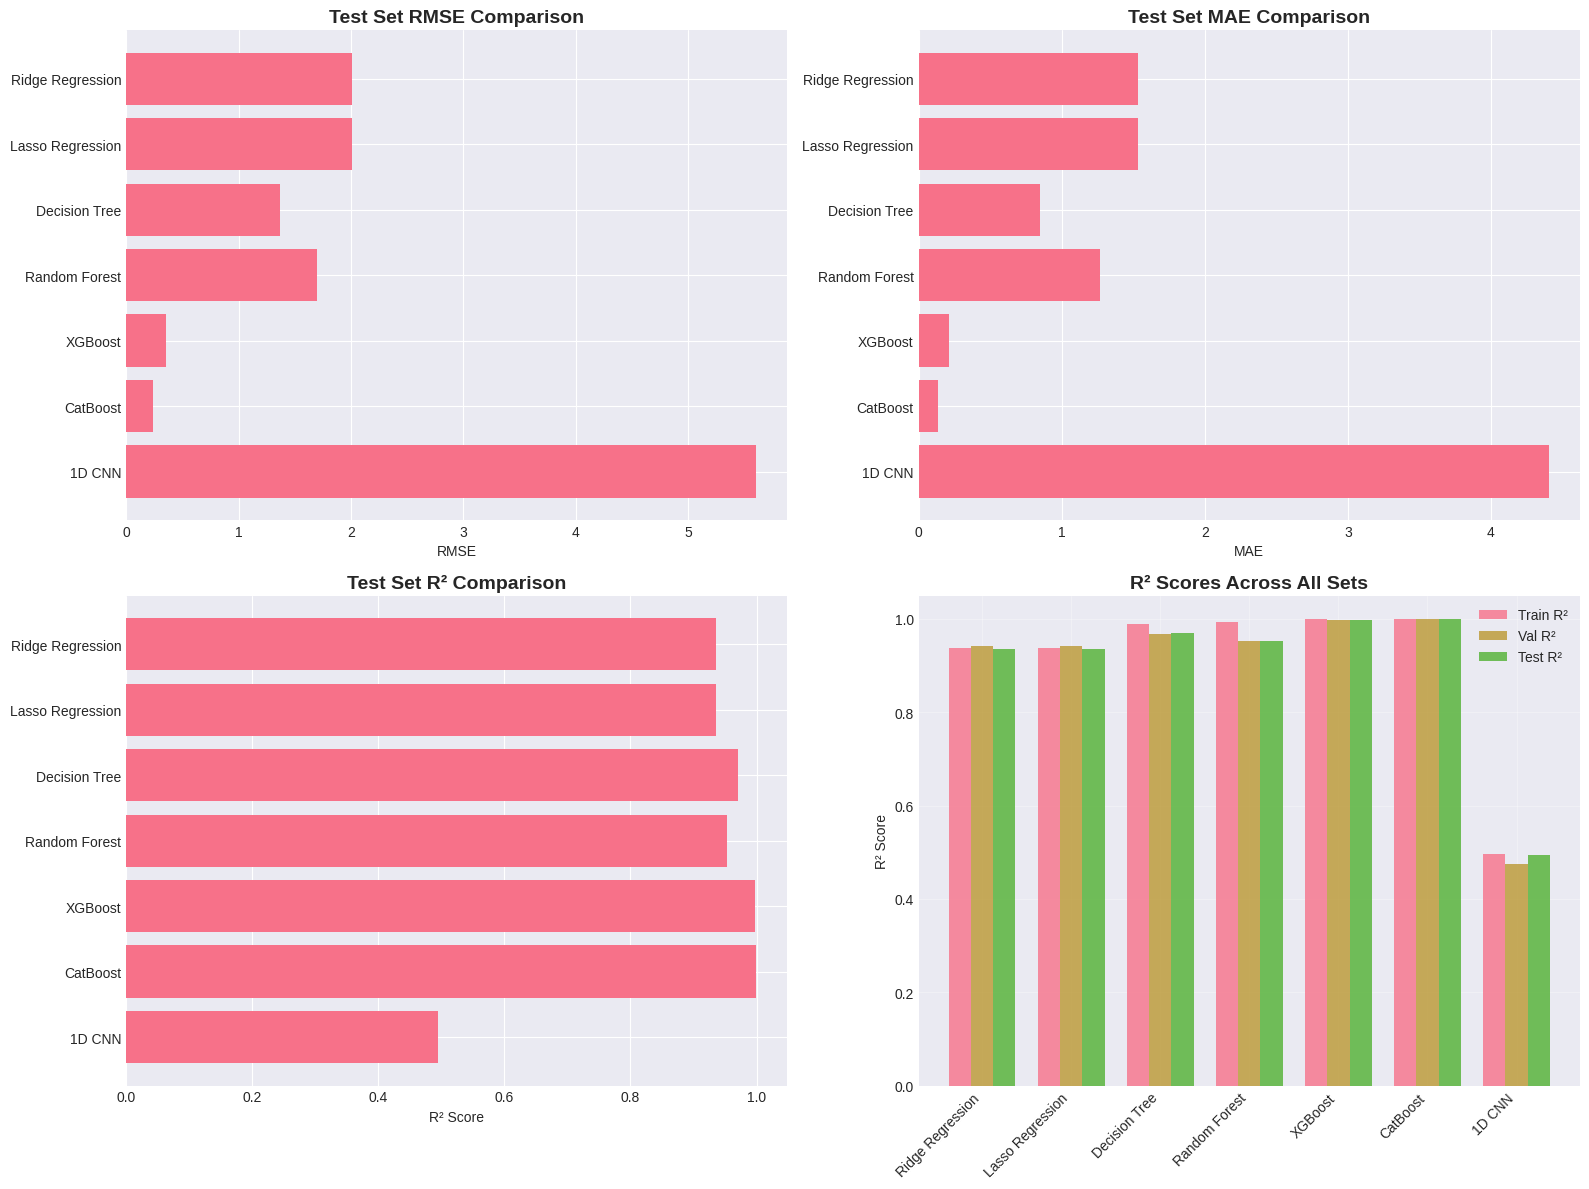

In [32]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Test RMSE
axes[0, 0].barh(results_df['Model'], results_df['Test_RMSE'])
axes[0, 0].set_xlabel('RMSE')
axes[0, 0].set_title('Test Set RMSE Comparison', fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()

# Test MAE
axes[0, 1].barh(results_df['Model'], results_df['Test_MAE'])
axes[0, 1].set_xlabel('MAE')
axes[0, 1].set_title('Test Set MAE Comparison', fontsize=14, fontweight='bold')
axes[0, 1].invert_yaxis()

# Test R²
axes[1, 0].barh(results_df['Model'], results_df['Test_R2'])
axes[1, 0].set_xlabel('R² Score')
axes[1, 0].set_title('Test Set R² Comparison', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()

# All metrics comparison
x = np.arange(len(results_df))
width = 0.25
axes[1, 1].bar(x - width, results_df['Train_R2'], width, label='Train R²', alpha=0.8)
axes[1, 1].bar(x, results_df['Val_R2'], width, label='Val R²', alpha=0.8)
axes[1, 1].bar(x + width, results_df['Test_R2'], width, label='Test R²', alpha=0.8)
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_title('R² Scores Across All Sets', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Identify best model
best_model_idx = results_df['Test_RMSE'].idxmin()
best_model = results_df.loc[best_model_idx]

print("\n" + "="*80)
print("BEST MODEL")
print("="*80)
print(f"Model: {best_model['Model']}")
print(f"Test RMSE: {best_model['Test_RMSE']:.4f}")
print(f"Test MAE: {best_model['Test_MAE']:.4f}")
print(f"Test R²: {best_model['Test_R2']:.4f}")
print("="*80)


🏆 BEST MODEL
Model: CatBoost
Test RMSE: 0.2363
Test MAE: 0.1336
Test R²: 0.9991


In [34]:
# Check for overfitting
results_df['Train_Val_RMSE_Diff'] = results_df['Train_RMSE'] - results_df['Val_RMSE']
results_df['Train_Test_RMSE_Diff'] = results_df['Train_RMSE'] - results_df['Test_RMSE']

print("\n" + "="*80)
print("OVERFITTING ANALYSIS")
print("="*80)
print("\nRMSE Differences (negative means worse on train):")
print(results_df[['Model', 'Train_Val_RMSE_Diff', 'Train_Test_RMSE_Diff']].to_string(index=False))
print("\nNote: Large positive differences indicate potential overfitting")
print("="*80)


OVERFITTING ANALYSIS

RMSE Differences (negative means worse on train):
           Model  Train_Val_RMSE_Diff  Train_Test_RMSE_Diff
Ridge Regression             0.065217             -0.063170
Lasso Regression             0.064653             -0.062186
   Decision Tree            -0.558115             -0.540934
   Random Forest            -1.047472             -1.060750
         XGBoost            -0.154710             -0.141574
        CatBoost            -0.055766             -0.042346
          1D CNN            -0.125604             -0.100879

Note: Large positive differences indicate potential overfitting


## Conclusion and Recommendations

In [ ]:
print("\n" + "="*80)
print("SUMMARY AND RECOMMENDATIONS")
print("="*80)

print(f"\n1. Best Overall Model: {best_model['Model']}")
print(f"   - Achieves the lowest test RMSE: {best_model['Test_RMSE']:.4f}")
print(f"   - R² Score: {best_model['Test_R2']:.4f}")

print("\n2. Model Rankings by Test RMSE:")
rankings = results_df.sort_values('Test_RMSE')[['Model', 'Test_RMSE', 'Test_R2']]
for idx, (_, row) in enumerate(rankings.iterrows(), 1):
    print(f"   {idx}. {row['Model']:20s} - RMSE: {row['Test_RMSE']:.4f}, R²: {row['Test_R2']:.4f}")

print("\n3. Key Insights:")
print("   - Tree-based models (RF, XGBoost, CatBoost) generally perform well")
print("   - Linear models (Ridge, Lasso) provide interpretability but may underperform")
print("   - Deep learning (CNN) requires more data for optimal performance")

print("\n4. Recommendations for Deployment:")
print(f"   - Use {best_model['Model']} for production")
print("   - Monitor model performance regularly")
print("   - Consider ensemble methods combining top models")
print("   - Implement feature engineering for further improvement")

print("\n5. Future Improvements:")
print("   - Feature engineering (interactions, polynomials)")
print("   - More advanced hyperparameter optimization (Bayesian)")
print("   - Ensemble methods (stacking, blending)")
print("   - Feature selection techniques")
print("   - Handle imbalanced data if present")
print("="*80)


📊 SUMMARY AND RECOMMENDATIONS

1. Best Overall Model: CatBoost
   - Achieves the lowest test RMSE: 0.2363
   - R² Score: 0.9991

2. Model Rankings by Test RMSE:
   1. CatBoost             - RMSE: 0.2363, R²: 0.9991
   2. XGBoost              - RMSE: 0.3548, R²: 0.9980
   3. Decision Tree        - RMSE: 1.3704, R²: 0.9698
   4. Random Forest        - RMSE: 1.7000, R²: 0.9535
   5. Lasso Regression     - RMSE: 2.0099, R²: 0.9349
   6. Ridge Regression     - RMSE: 2.0101, R²: 0.9349
   7. 1D CNN               - RMSE: 5.6015, R²: 0.4946

3. Key Insights:
   - Tree-based models (RF, XGBoost, CatBoost) generally perform well
   - Linear models (Ridge, Lasso) provide interpretability but may underperform
   - Deep learning (CNN) requires more data for optimal performance

4. Recommendations for Deployment:
   - Use CatBoost for production
   - Monitor model performance regularly
   - Consider ensemble methods combining top models
   - Implement feature engineering for further improvement

5.

In [ ]:
# Save results to CSV
results_df.to_csv('model_comparison_results.csv', index=False)
print("\nResults saved to 'model_comparison_results.csv'")


✅ Results saved to 'model_comparison_results.csv'
